<a href="https://colab.research.google.com/github/vrohra99/mtp/blob/main/Health_FD002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
 
 
uploaded = files.upload()

Saving train_FD002.txt to train_FD002.txt


In [2]:
pip install hmmlearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 129 kB 8.6 MB/s 


In [14]:
import pandas as pd
from hmmlearn.hmm import GMMHMM, GaussianHMM
from hmmlearn.base import BaseHMM
from sklearn.preprocessing import StandardScaler
import io

In [15]:
traindata = pd.read_csv(io.BytesIO(uploaded['train_FD002.txt']), sep= " ", header = None )
traindata.drop([26,27],inplace=True,axis=1)
traindata.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286


In [16]:
engines=int(traindata.loc[traindata.shape[0]-1][0])
engines

260

In [17]:
hpc_kpi=[7,11,15]


In [18]:
hiddenstates=30

In [19]:
startprob=[0]*hiddenstates
startprob[0]=1
print(startprob)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [20]:
import numpy as np
transmat=np.identity(hiddenstates)
for i in range(0,hiddenstates-1):
    transmat[i][i]=0.5
    transmat[i][i+1]=0.5

In [21]:
health_state=[]

In [22]:
def iterate(i):
  try:
    hpc=traindata.loc[traindata[0]==i][hpc_kpi]
    hpc=StandardScaler().fit_transform(hpc)
    model = GMMHMM(n_components=30, covariance_type="diag", init_params="cm", params="cmt")
    model.transmat_=transmat
    model.startprob_=startprob
    model.fit(hpc)
    pred=model.decode(hpc,algorithm="viterbi")[1]
    health_state.append(pred)
    print(i)
  except:
    iterate(i)

In [23]:
for i in range(1,engines+1):
  iterate(i)
  print("*******************************************************************************************************************************************************************************")

/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


1
*******************************************************************************************************************************************************************************


2
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


3
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


4
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


5
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


6
*******************************************************************************************************************************************************************************


7
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: invalid value encountered in true_divide
  self.covars_ = c_n / c_d


8
*******************************************************************************************************************************************************************************


9
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


10
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


11
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


12
*******************************************************************************************************************************************************************************


13
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


14
*******************************************************************************************************************************************************************************


15
*******************************************************************************************************************************************************************************


16
*******************************************************************************************************************************************************************************


17
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


18
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]


19
*******************************************************************************************************************************************************************************


20
*******************************************************************************************************************************************************************************


21
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


22
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


23
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


24
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


25
*******************************************************************************************************************************************************************************


26
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


27
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


28
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


29
*******************************************************************************************************************************************************************************


30
*******************************************************************************************************************************************************************************


31
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


32
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


33
*******************************************************************************************************************************************************************************


34
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


35
*******************************************************************************************************************************************************************************


36
*******************************************************************************************************************************************************************************


37
*******************************************************************************************************************************************************************************


38
*******************************************************************************************************************************************************************************


39
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


40
*******************************************************************************************************************************************************************************


41
*******************************************************************************************************************************************************************************


42
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


43
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


44
*******************************************************************************************************************************************************************************


45
*******************************************************************************************************************************************************************************


46
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


47
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


48
*******************************************************************************************************************************************************************************


49
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


50
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


51
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


52
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


53
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


54
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


55
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


56
*******************************************************************************************************************************************************************************


57
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


58
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


59
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


60
*******************************************************************************************************************************************************************************


61
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


62
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


63
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


64
*******************************************************************************************************************************************************************************


65
*******************************************************************************************************************************************************************************


66
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]


67
*******************************************************************************************************************************************************************************


68
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


69
*******************************************************************************************************************************************************************************


70
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


71
*******************************************************************************************************************************************************************************


72
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


73
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


74
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


75
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


76
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


77
*******************************************************************************************************************************************************************************


78
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


79
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


80
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


81
*******************************************************************************************************************************************************************************


82
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


83
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


84
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


85
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


86
*******************************************************************************************************************************************************************************


87
*******************************************************************************************************************************************************************************


88
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


89
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


90
*******************************************************************************************************************************************************************************


91
*******************************************************************************************************************************************************************************


92
*******************************************************************************************************************************************************************************


93
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


94
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


95
*******************************************************************************************************************************************************************************


96
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


97
*******************************************************************************************************************************************************************************


98
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: invalid value encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


99
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


100
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


101
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


102
*******************************************************************************************************************************************************************************


103
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


104
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


105
*******************************************************************************************************************************************************************************


106
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]


107
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


108
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


109
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


110
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


111
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


112
*******************************************************************************************************************************************************************************


113
*******************************************************************************************************************************************************************************


114
*******************************************************************************************************************************************************************************


115
*******************************************************************************************************************************************************************************


116
*******************************************************************************************************************************************************************************


117
*******************************************************************************************************************************************************************************


118
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


119
*******************************************************************************************************************************************************************************


120
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


121
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


122
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


123
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


124
*******************************************************************************************************************************************************************************


125
*******************************************************************************************************************************************************************************


126
*******************************************************************************************************************************************************************************


127
*******************************************************************************************************************************************************************************


128
*******************************************************************************************************************************************************************************


129
*******************************************************************************************************************************************************************************


130
*******************************************************************************************************************************************************************************


131
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


132
*******************************************************************************************************************************************************************************


133
*******************************************************************************************************************************************************************************


134
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


135
*******************************************************************************************************************************************************************************


136
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


137
*******************************************************************************************************************************************************************************


138
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


139
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


140
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


141
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


142
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]


143
*******************************************************************************************************************************************************************************


144
*******************************************************************************************************************************************************************************


145
*******************************************************************************************************************************************************************************


146
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


147
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


148
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]


149
*******************************************************************************************************************************************************************************


150
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


151
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


152
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


153
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


154
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


155
*******************************************************************************************************************************************************************************


156
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


157
*******************************************************************************************************************************************************************************


158
*******************************************************************************************************************************************************************************


159
*******************************************************************************************************************************************************************************


160
*******************************************************************************************************************************************************************************


161
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


162
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


163
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


164
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


165
*******************************************************************************************************************************************************************************


166
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


167
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


168
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


169
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


170
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


171
*******************************************************************************************************************************************************************************


172
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


173
*******************************************************************************************************************************************************************************


174
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


175
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


176
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


177
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


178
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


179
*******************************************************************************************************************************************************************************


180
*******************************************************************************************************************************************************************************


181
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


182
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


183
*******************************************************************************************************************************************************************************


184
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


185
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


186
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


187
*******************************************************************************************************************************************************************************


188
*******************************************************************************************************************************************************************************


189
*******************************************************************************************************************************************************************************


190
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


191
*******************************************************************************************************************************************************************************


192
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


193
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


194
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


195
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


196
*******************************************************************************************************************************************************************************


197
*******************************************************************************************************************************************************************************


198
*******************************************************************************************************************************************************************************


199
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


200
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


201
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


202
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


203
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


204
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


205
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


206
*******************************************************************************************************************************************************************************


207
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


208
*******************************************************************************************************************************************************************************


209
*******************************************************************************************************************************************************************************


210
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


211
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


212
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


213
*******************************************************************************************************************************************************************************


214
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


215
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


216
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


217
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: divide by zero encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:998: RuntimeWarning: invalid value encountered in true_divide
  self.means_ = m_n / m_d[:, :, None]


218
*******************************************************************************************************************************************************************************


219
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/hmm.py:1051: RuntimeWarning: invalid value encountered in true_divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


220
*******************************************************************************************************************************************************************************


221
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


222
*******************************************************************************************************************************************************************************


223
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


224
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


225
*******************************************************************************************************************************************************************************


226
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


227
*******************************************************************************************************************************************************************************


228
*******************************************************************************************************************************************************************************


229
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


230
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


231
*******************************************************************************************************************************************************************************


232
*******************************************************************************************************************************************************************************


233
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


234
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


235
*******************************************************************************************************************************************************************************


236
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


237
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


238
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


239
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


240
*******************************************************************************************************************************************************************************


241
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


242
*******************************************************************************************************************************************************************************


243
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


244
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


245
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


246
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


247
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


248
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


249
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


250
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice
/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


251
*******************************************************************************************************************************************************************************


252
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


253
*******************************************************************************************************************************************************************************


254
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


255
*******************************************************************************************************************************************************************************


256
*******************************************************************************************************************************************************************************


257
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


258
*******************************************************************************************************************************************************************************


/usr/local/lib/python3.7/dist-packages/hmmlearn/base.py:588: RuntimeWarning: overflow encountered in add
  log_gamma = fwdlattice + bwdlattice


259
*******************************************************************************************************************************************************************************


260
*******************************************************************************************************************************************************************************


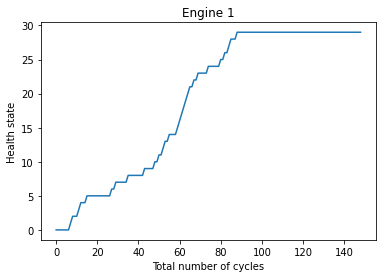

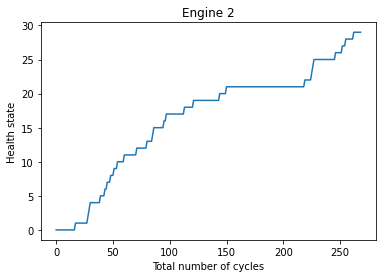

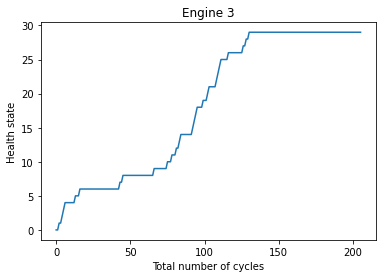

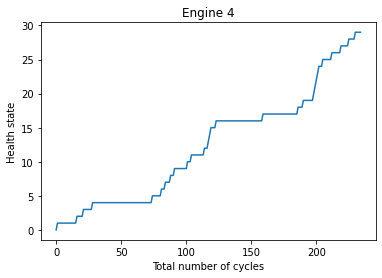

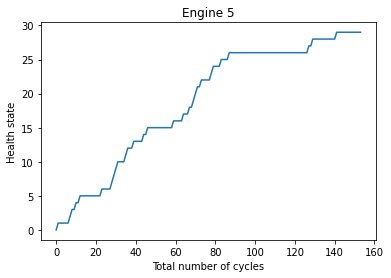

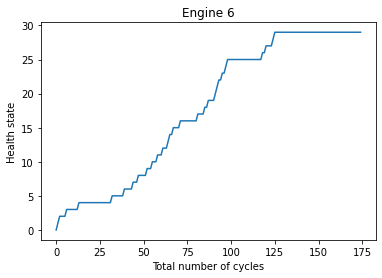

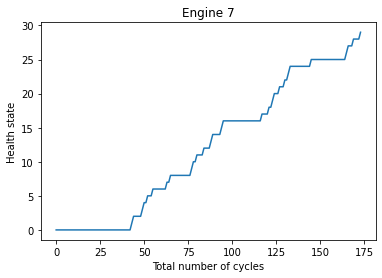

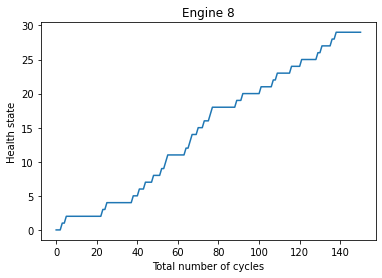

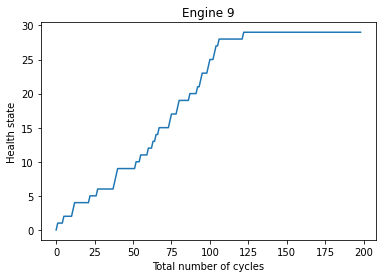

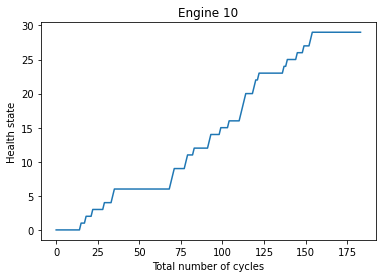

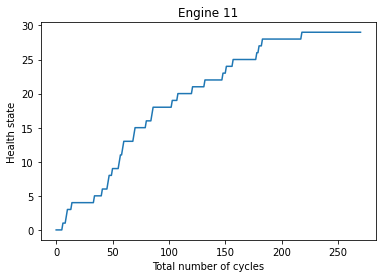

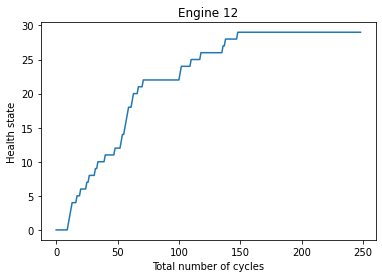

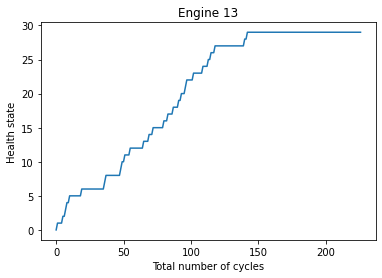

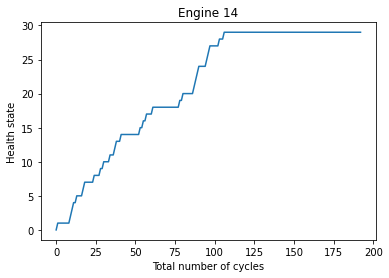

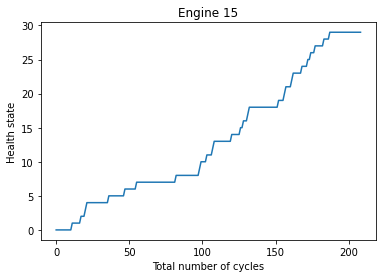

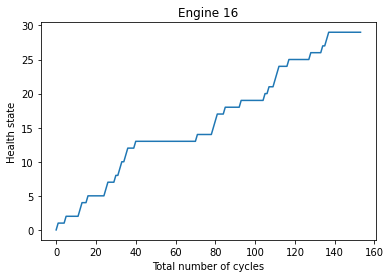

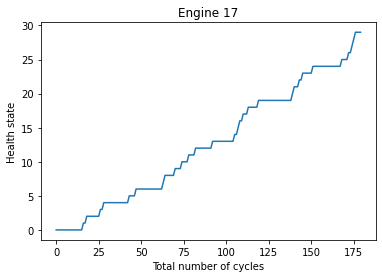

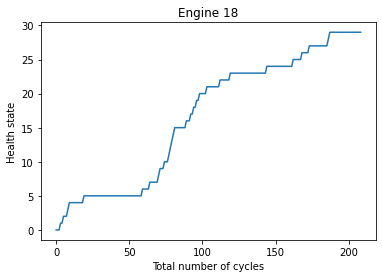

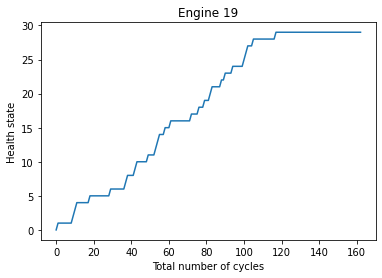

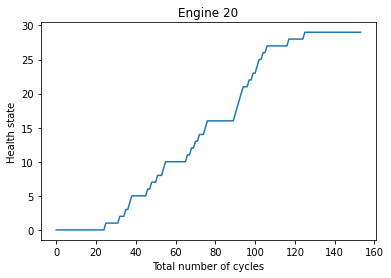

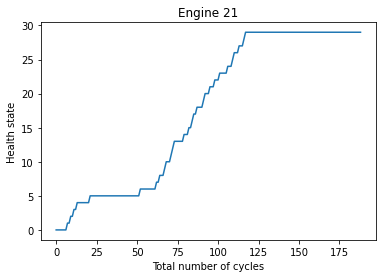

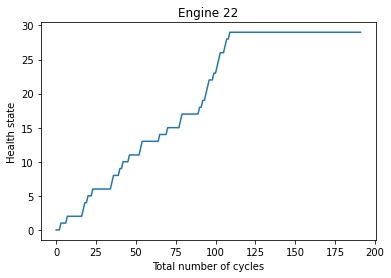

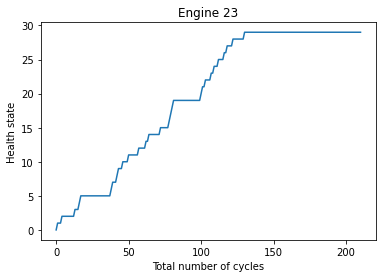

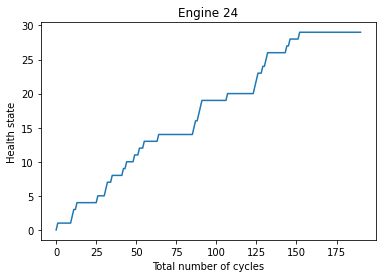

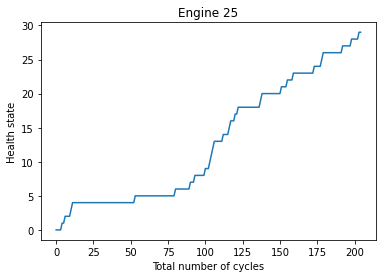

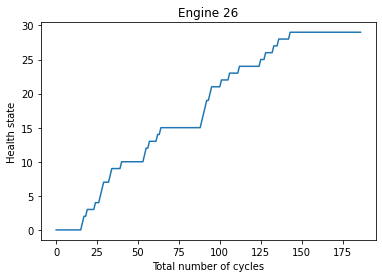

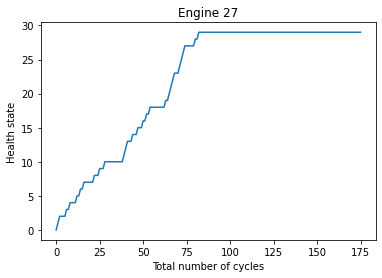

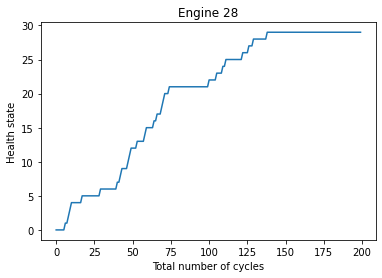

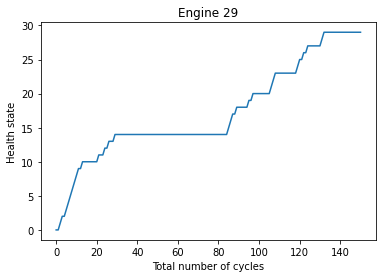

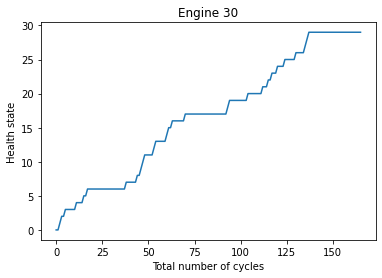

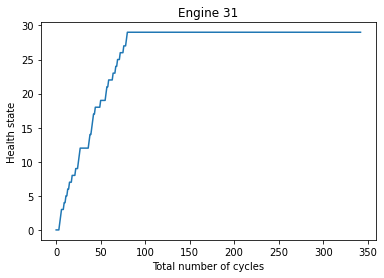

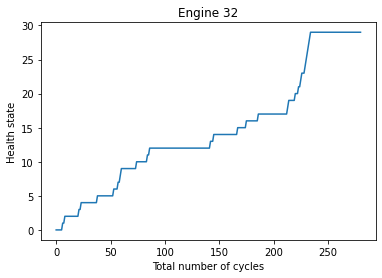

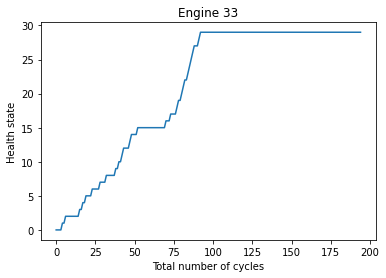

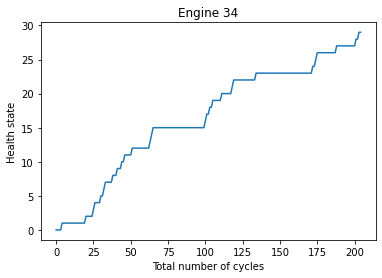

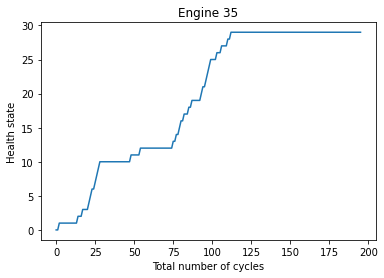

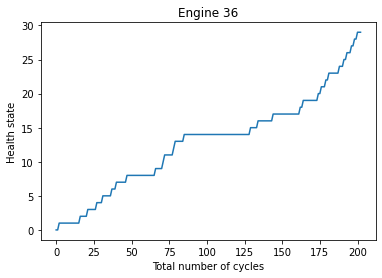

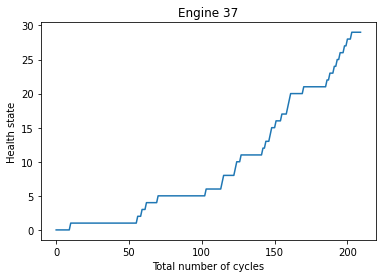

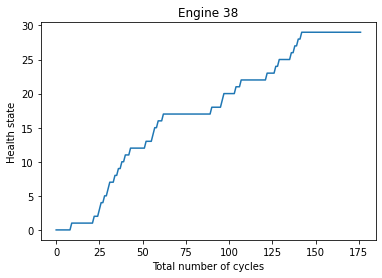

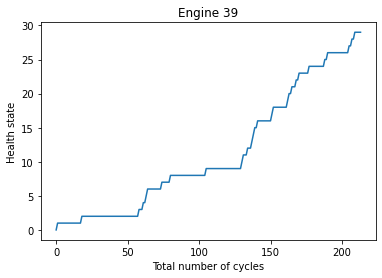

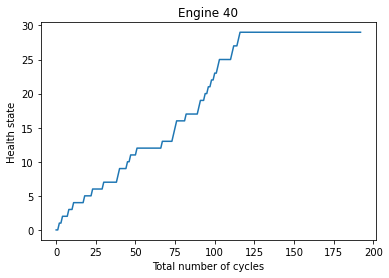

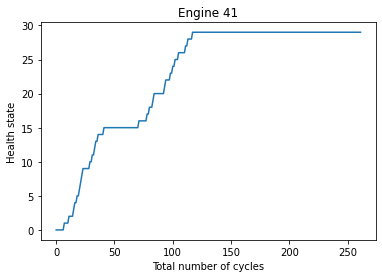

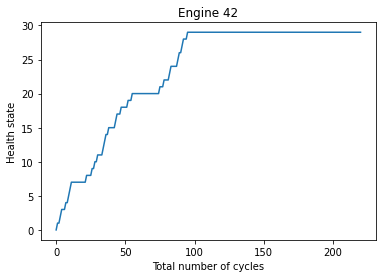

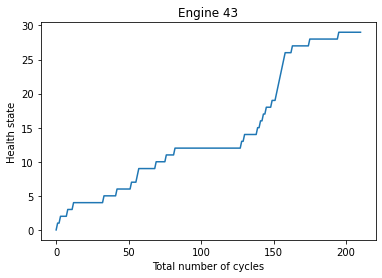

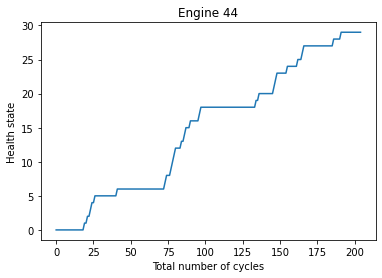

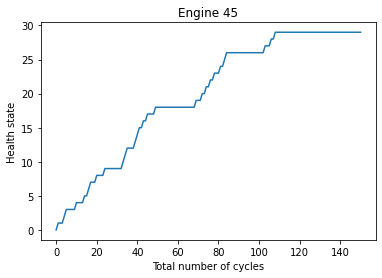

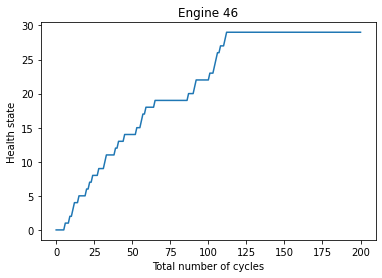

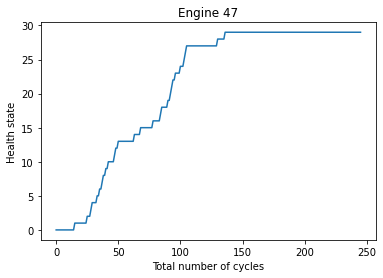

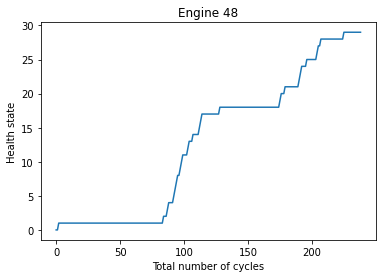

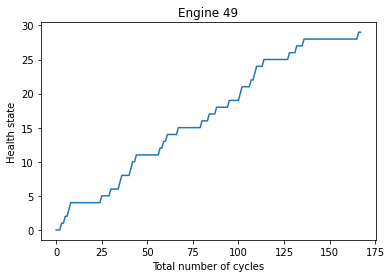

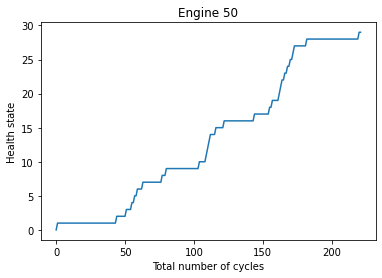

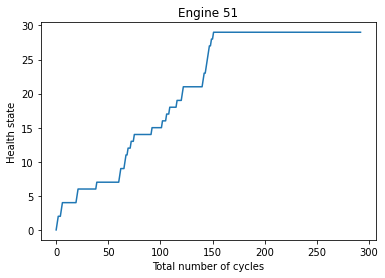

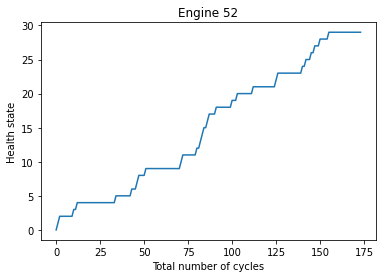

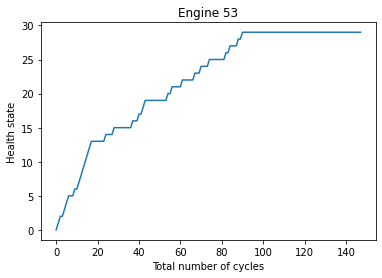

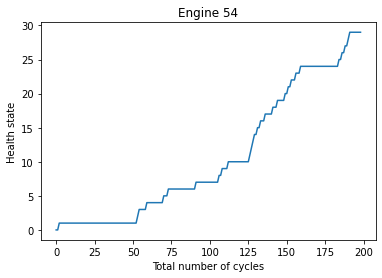

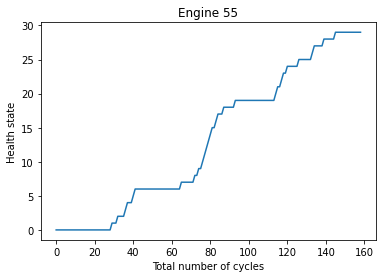

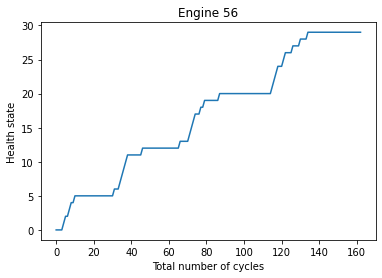

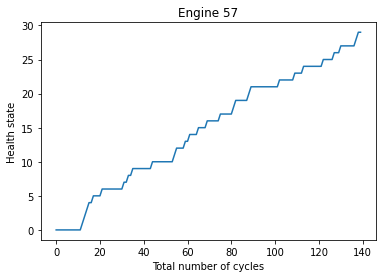

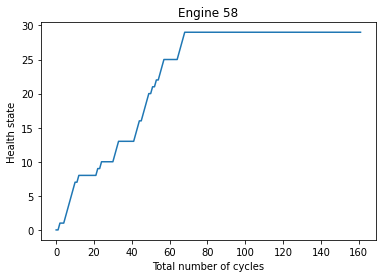

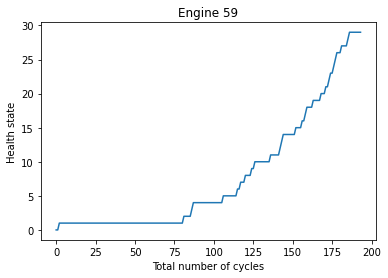

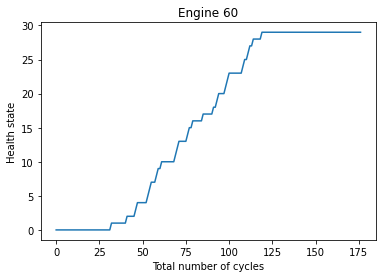

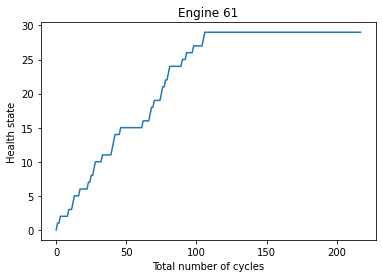

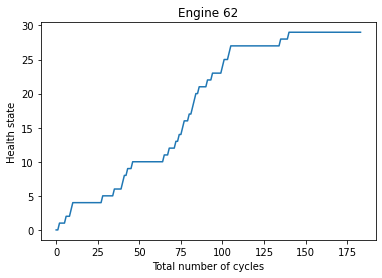

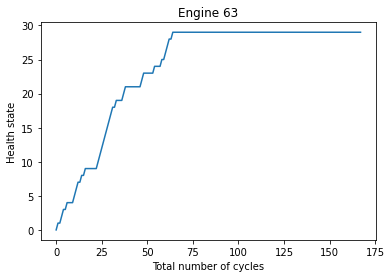

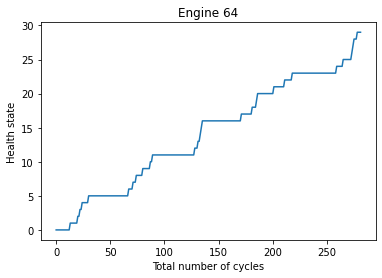

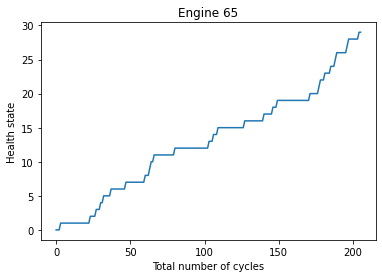

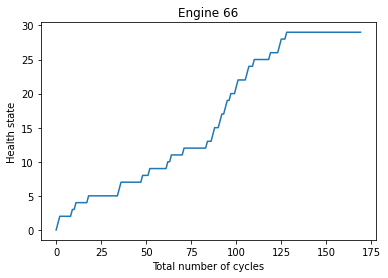

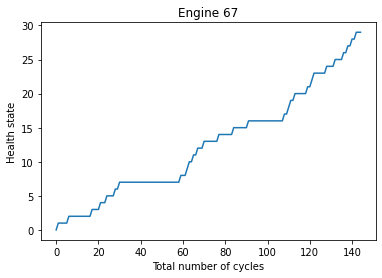

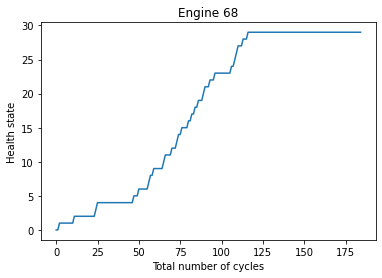

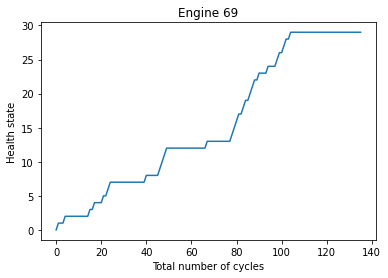

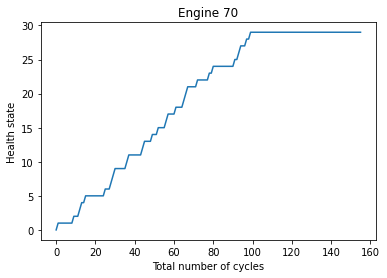

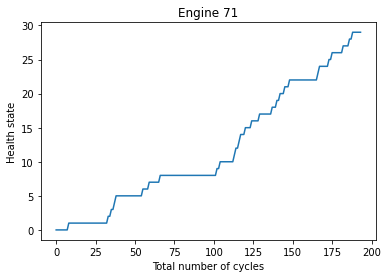

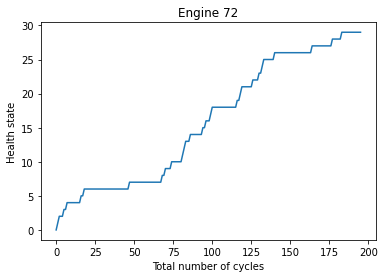

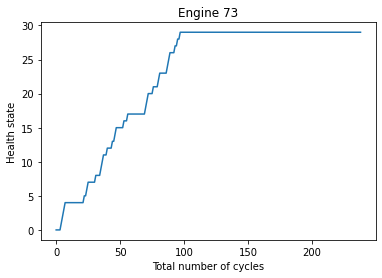

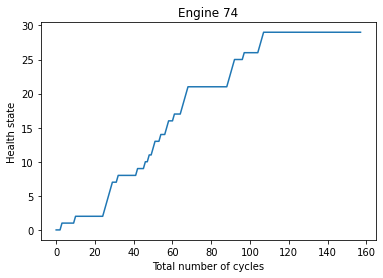

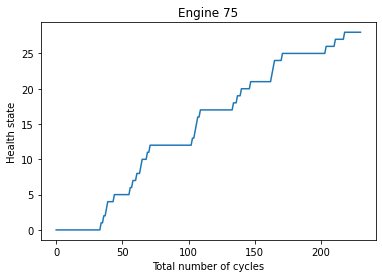

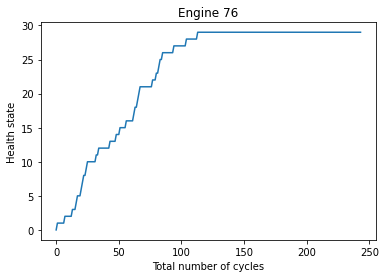

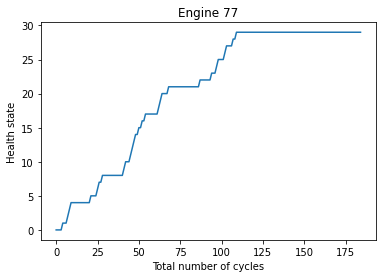

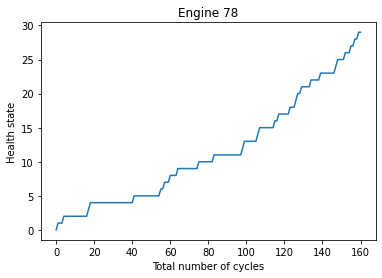

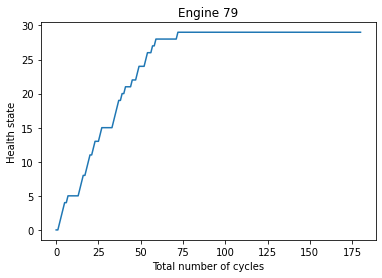

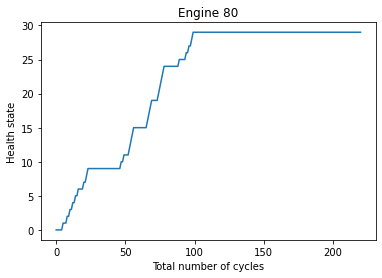

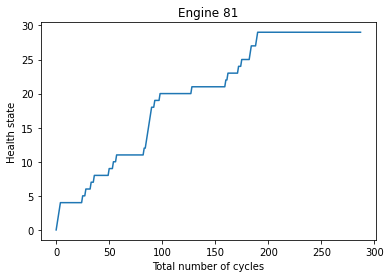

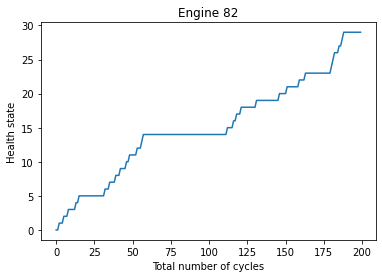

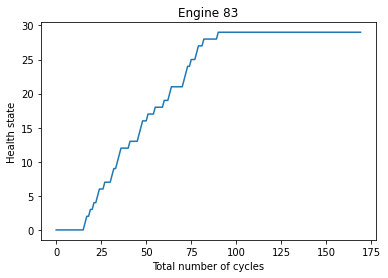

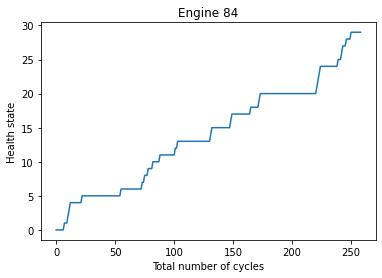

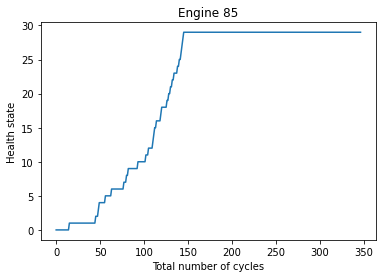

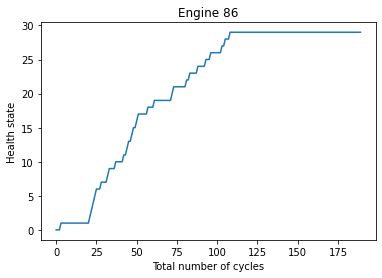

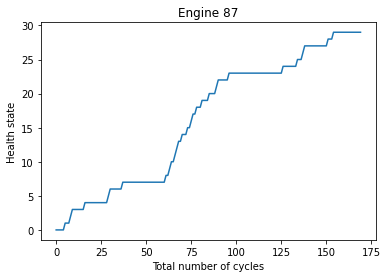

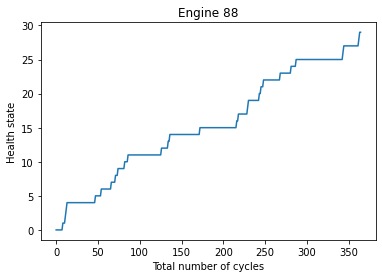

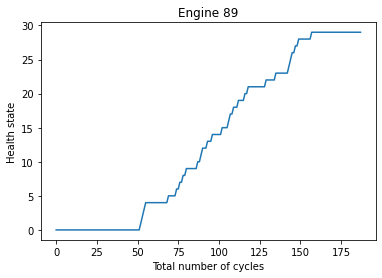

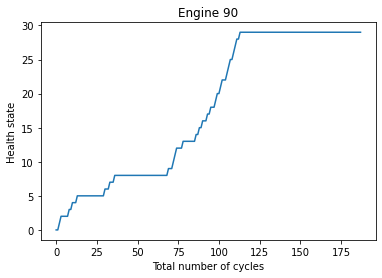

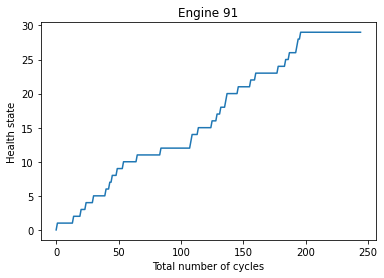

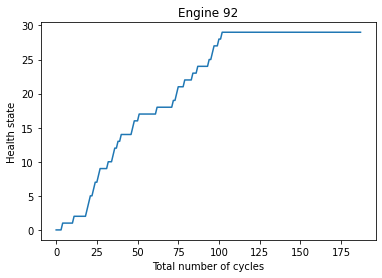

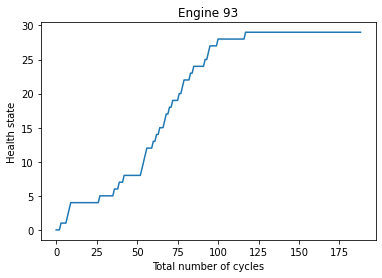

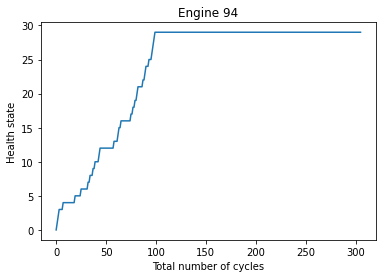

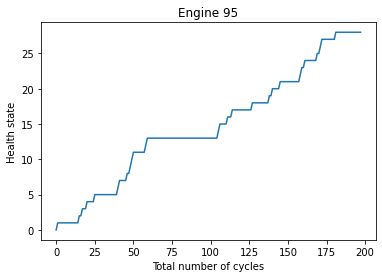

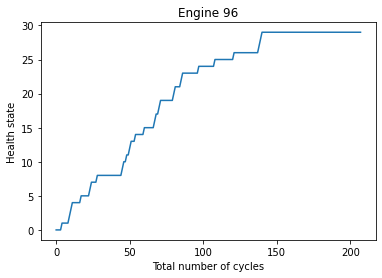

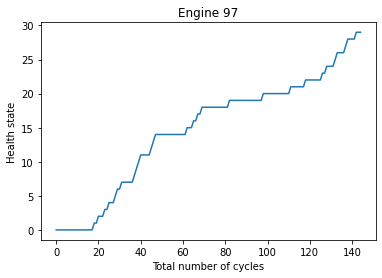

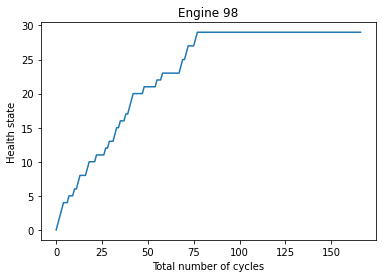

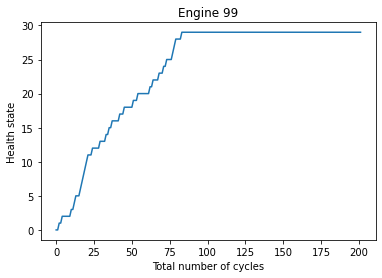

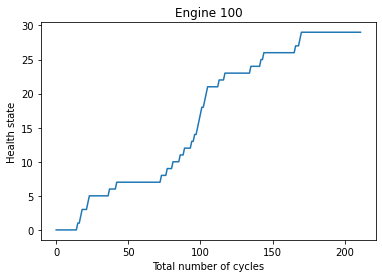

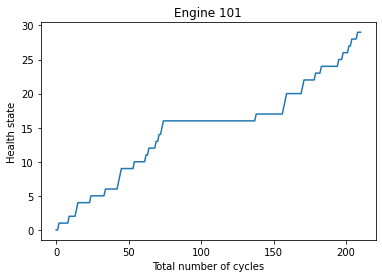

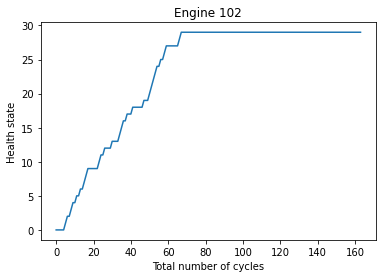

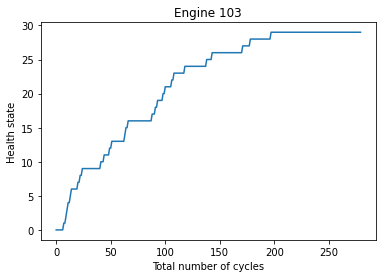

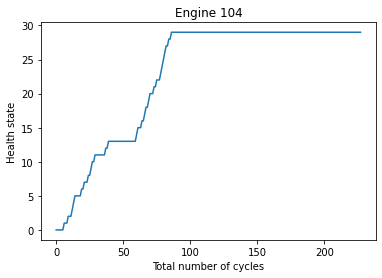

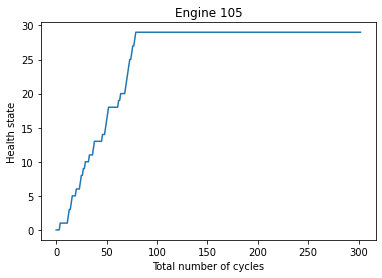

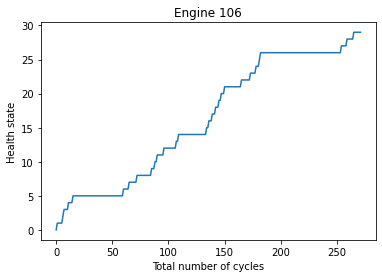

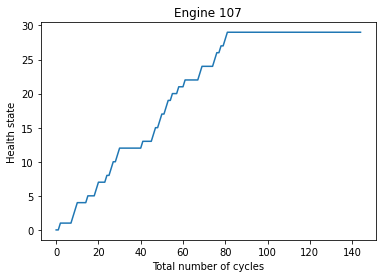

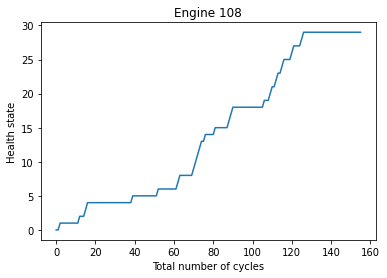

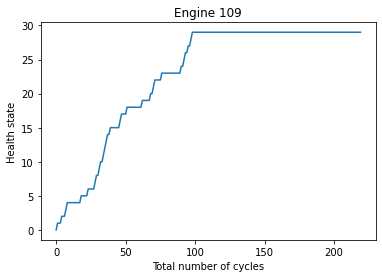

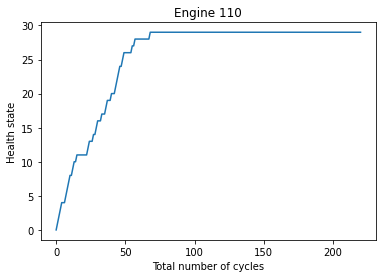

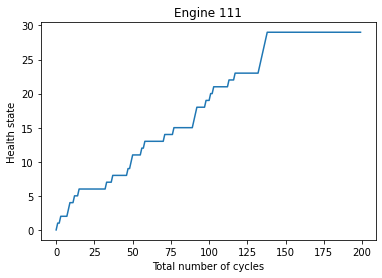

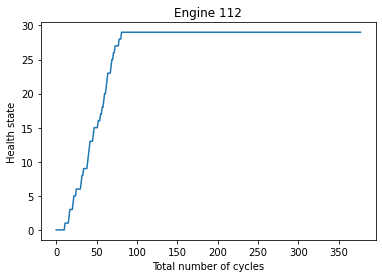

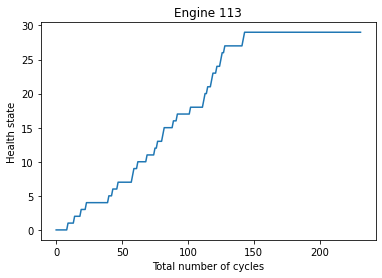

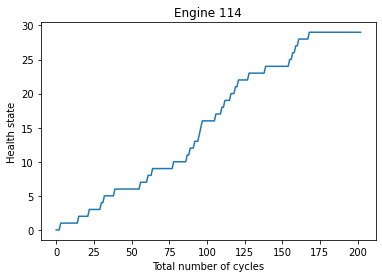

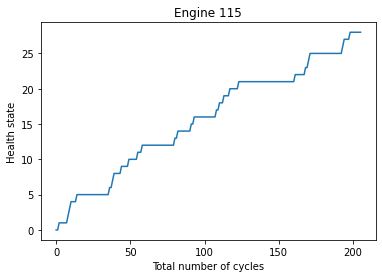

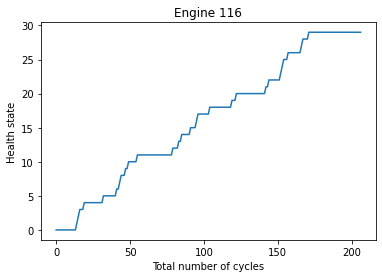

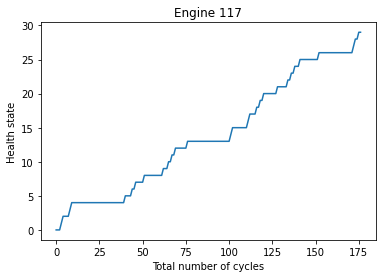

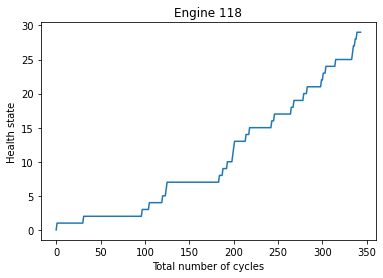

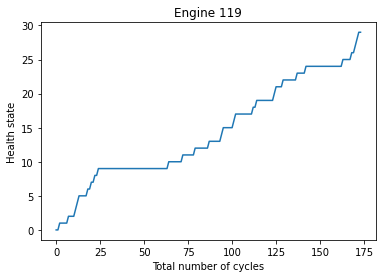

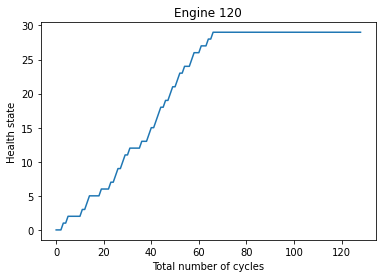

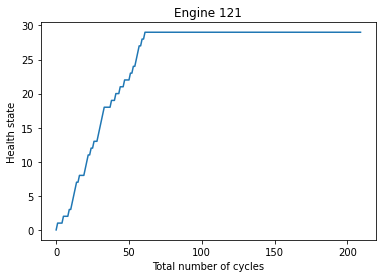

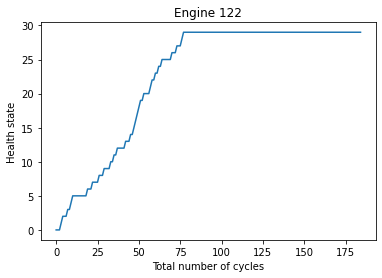

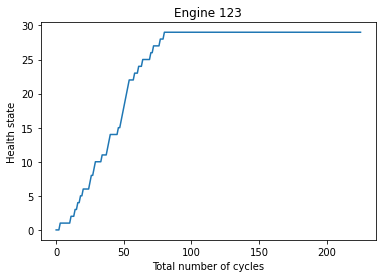

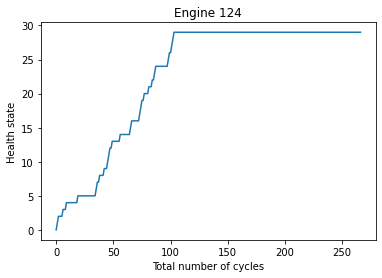

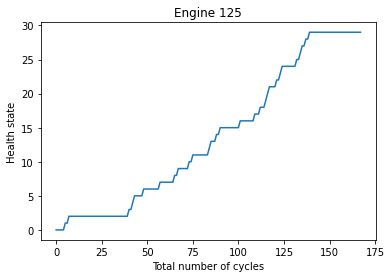

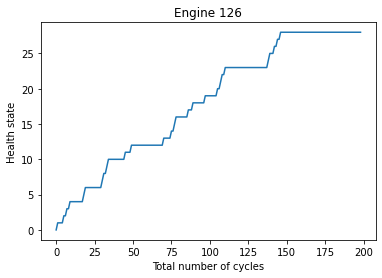

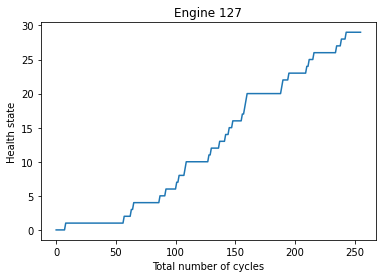

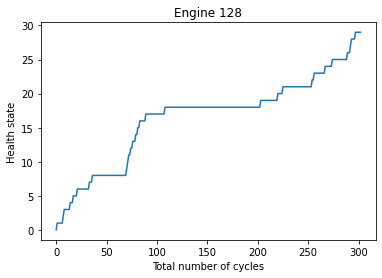

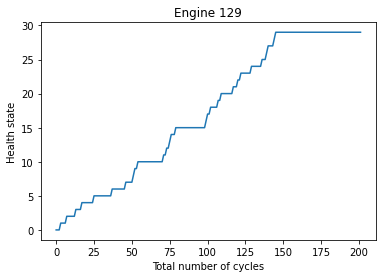

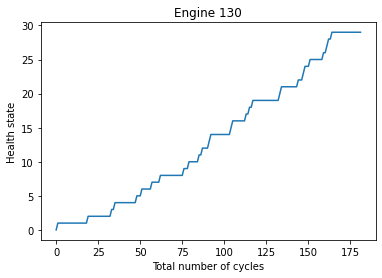

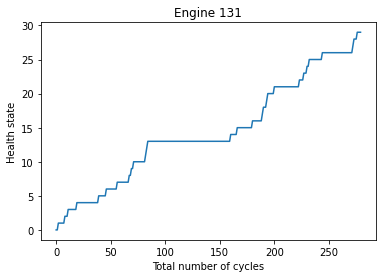

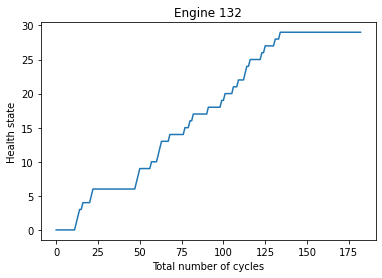

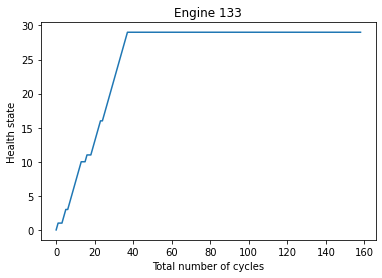

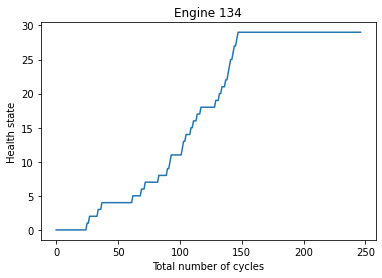

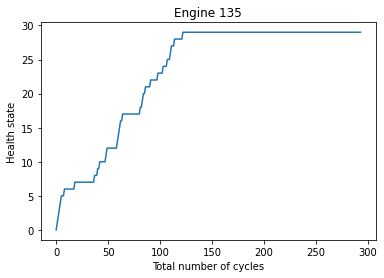

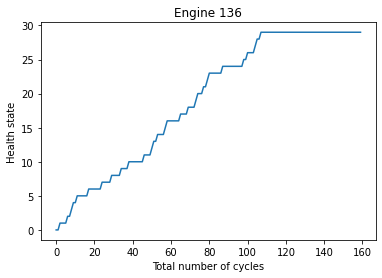

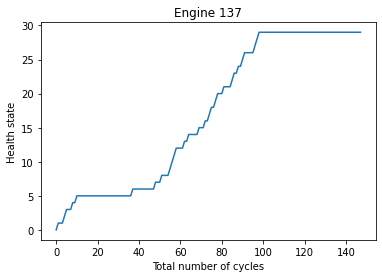

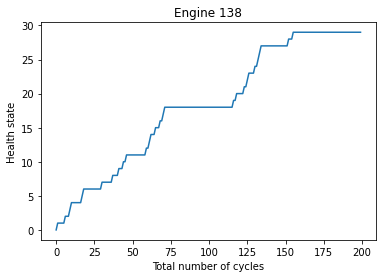

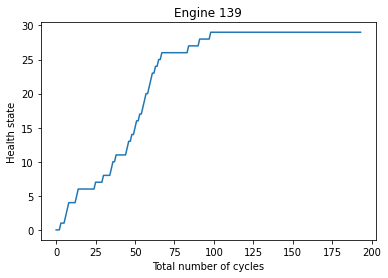

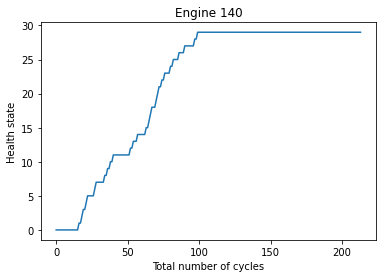

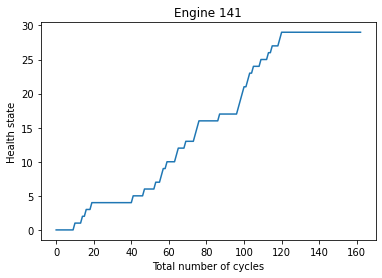

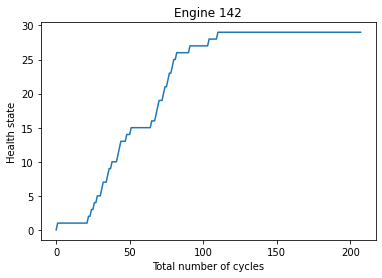

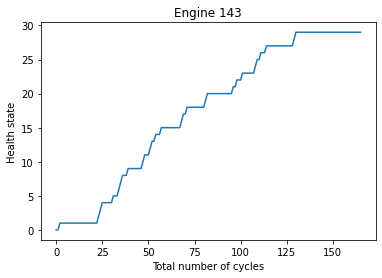

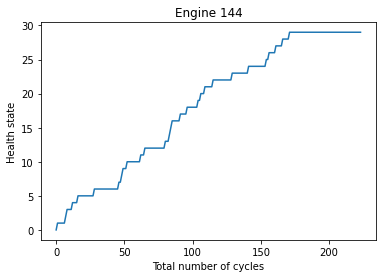

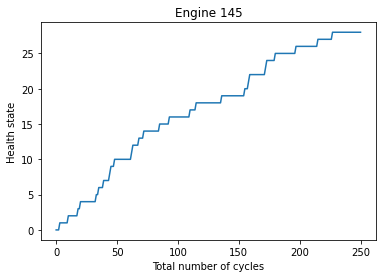

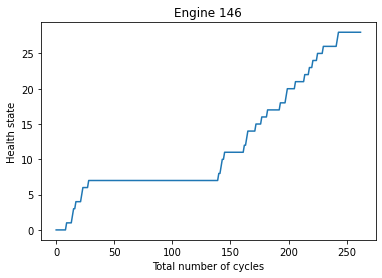

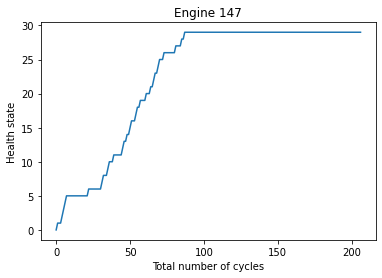

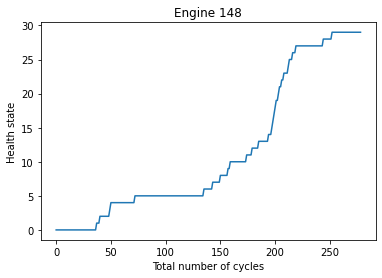

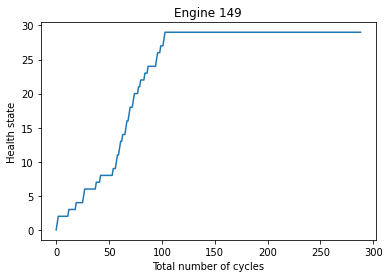

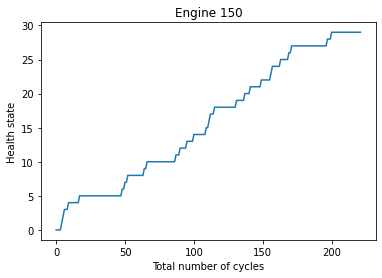

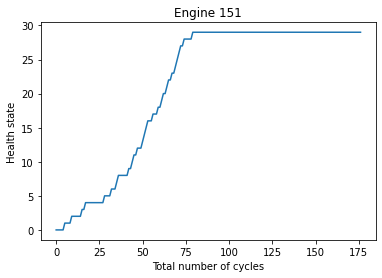

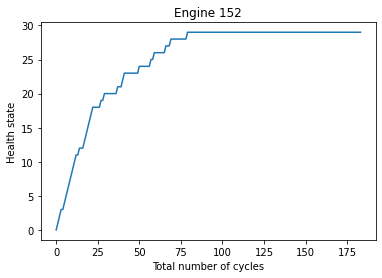

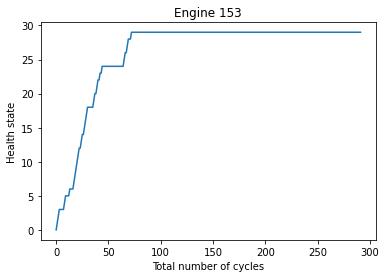

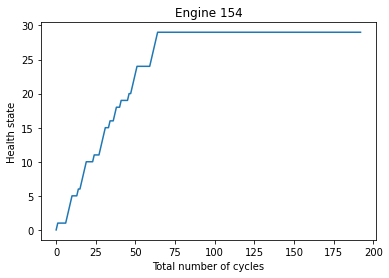

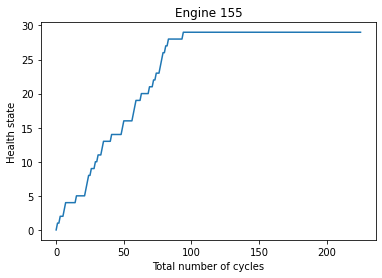

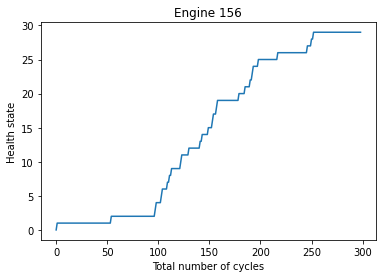

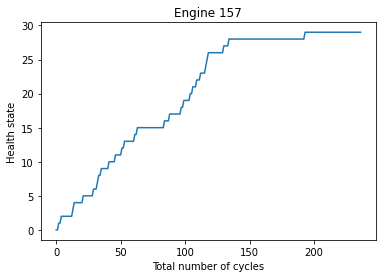

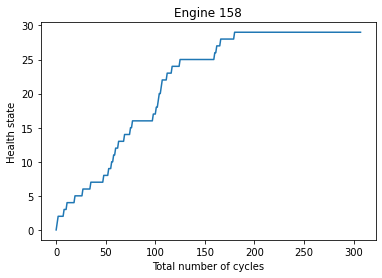

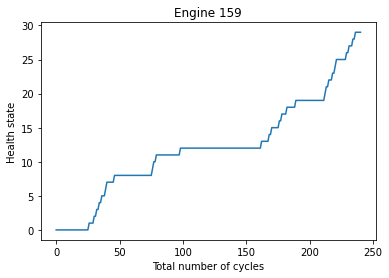

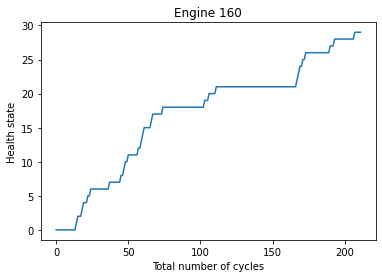

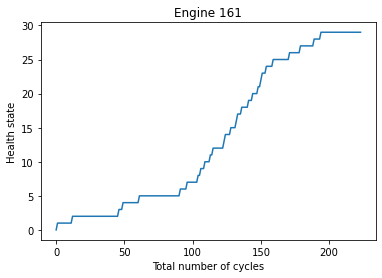

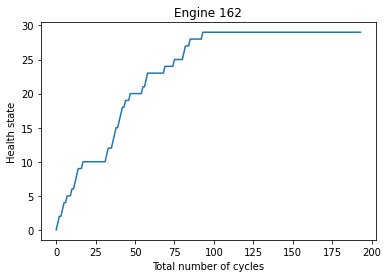

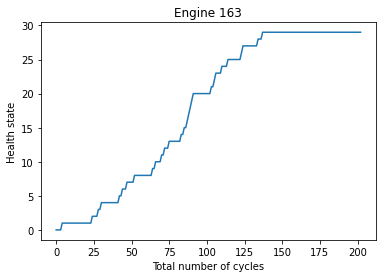

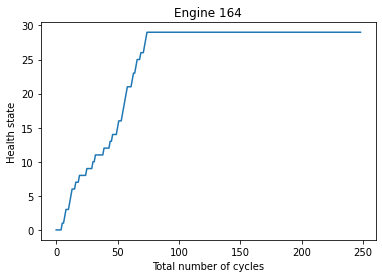

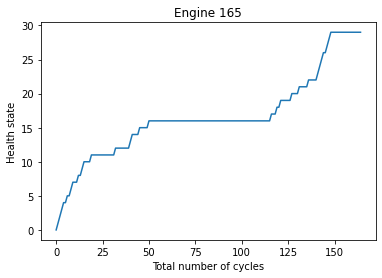

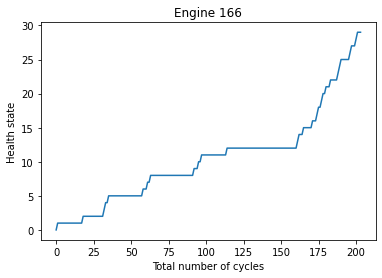

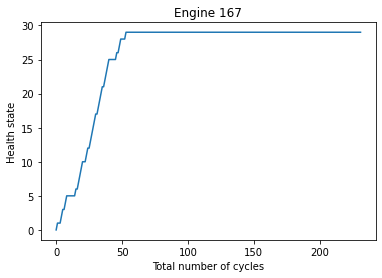

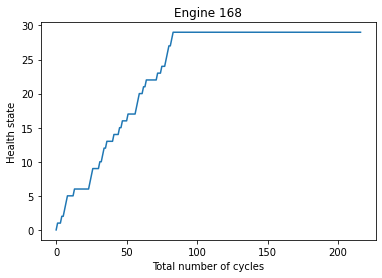

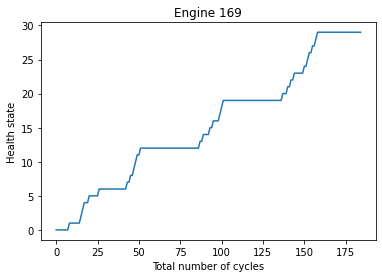

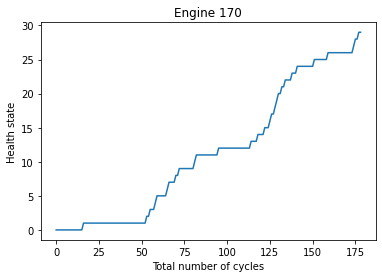

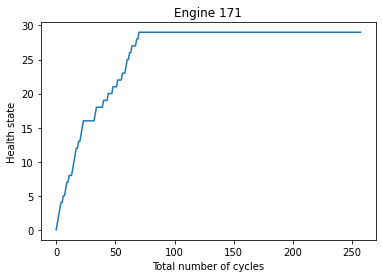

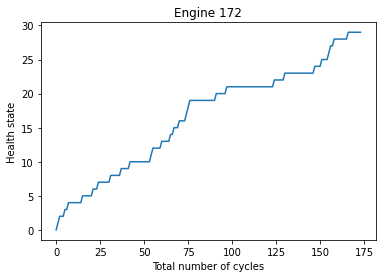

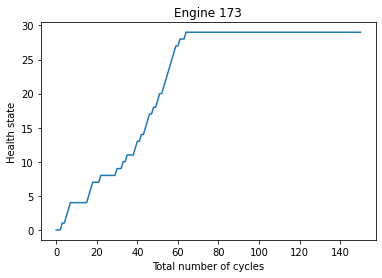

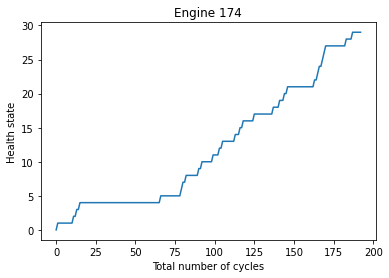

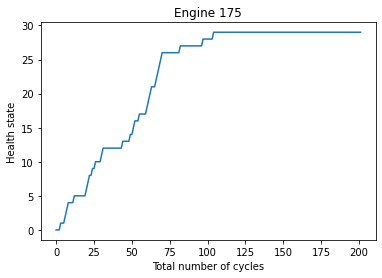

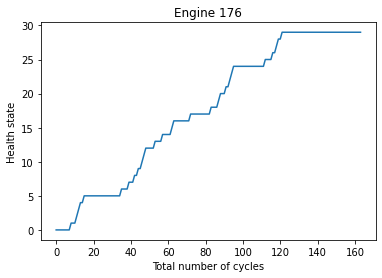

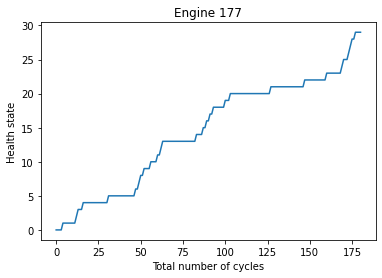

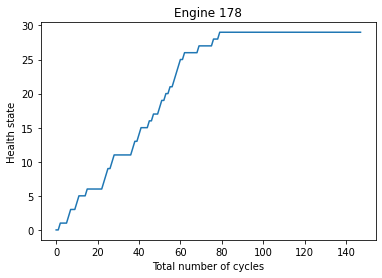

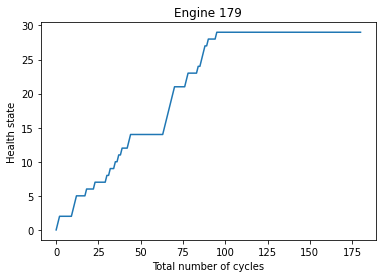

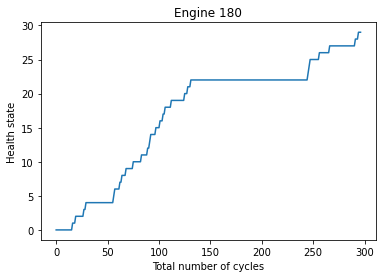

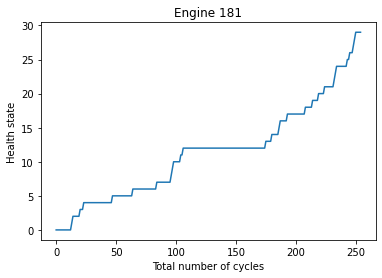

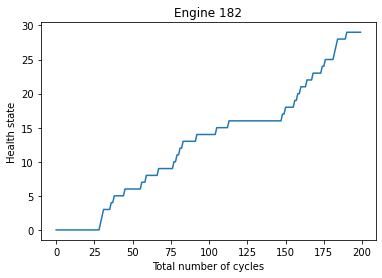

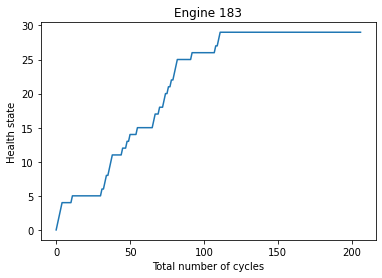

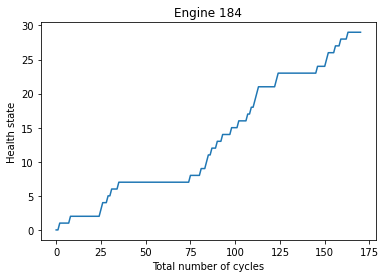

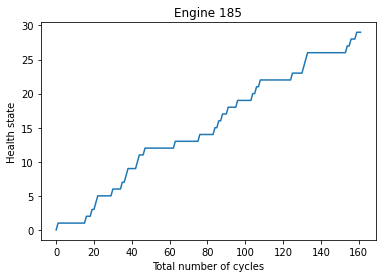

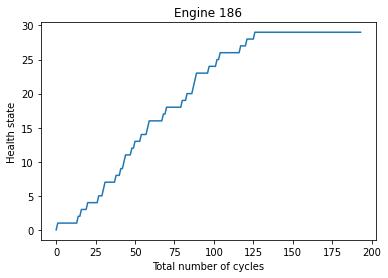

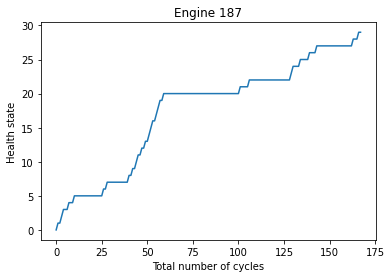

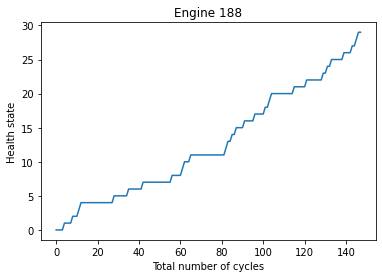

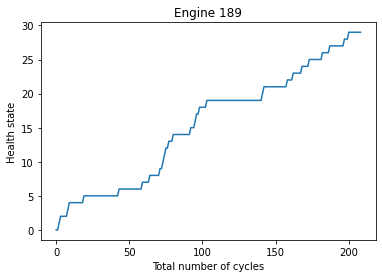

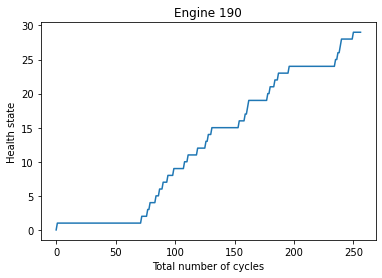

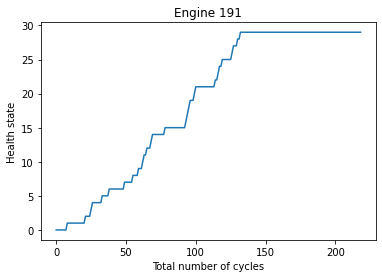

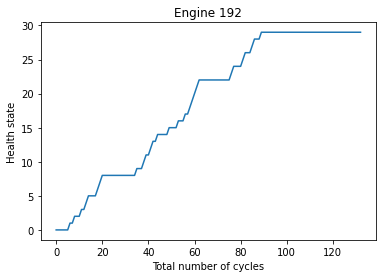

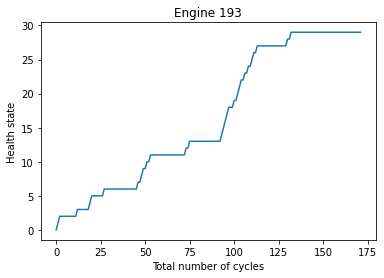

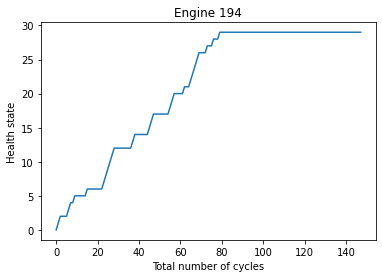

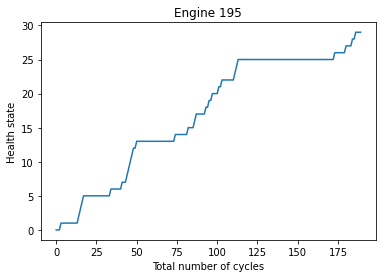

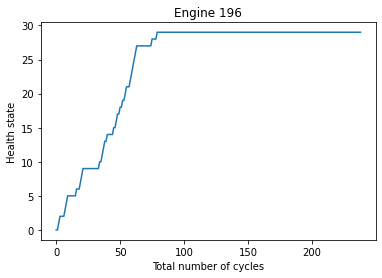

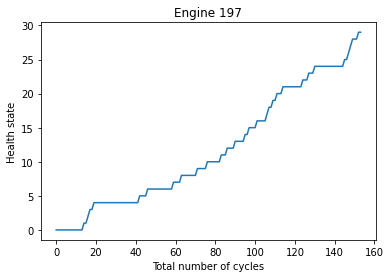

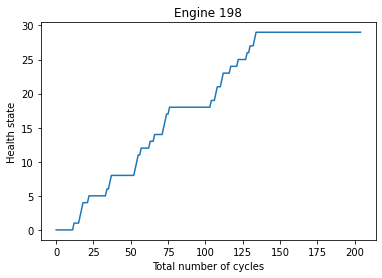

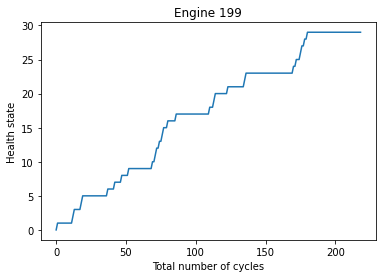

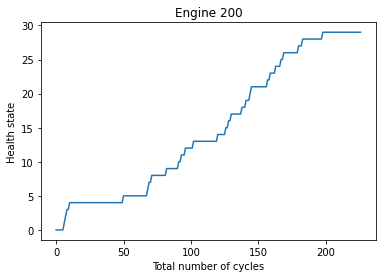

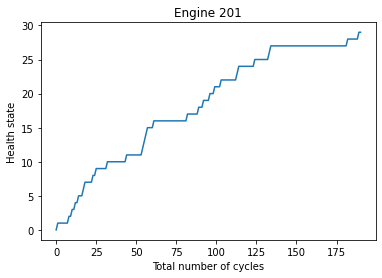

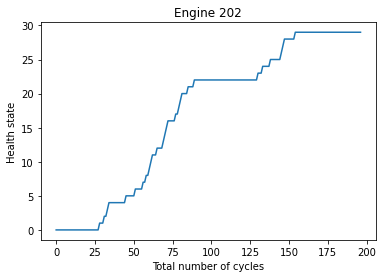

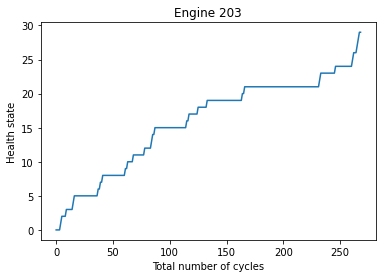

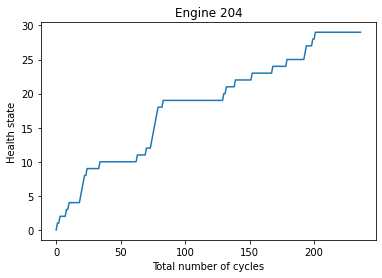

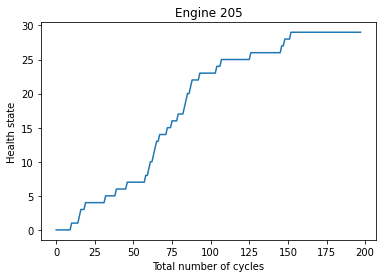

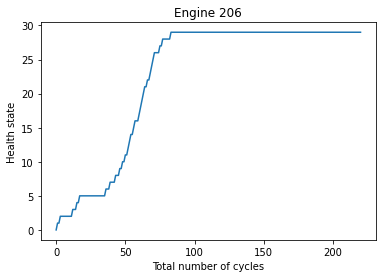

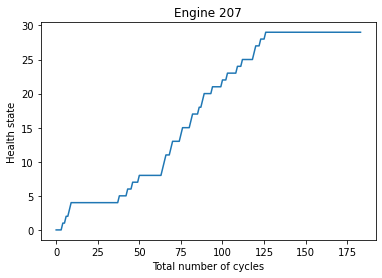

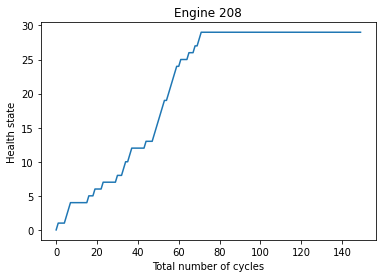

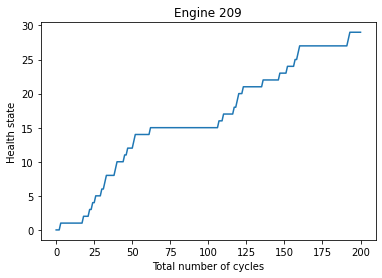

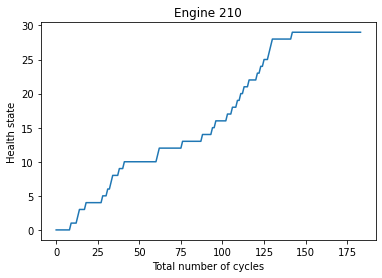

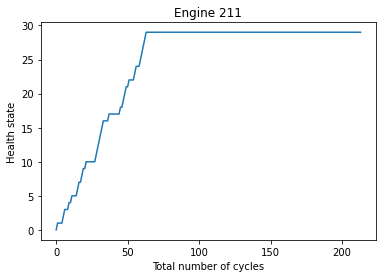

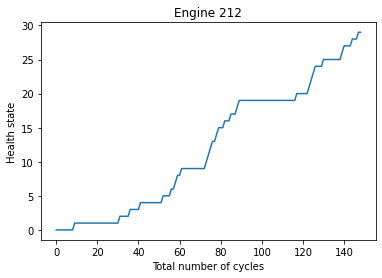

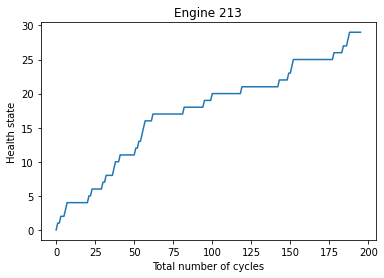

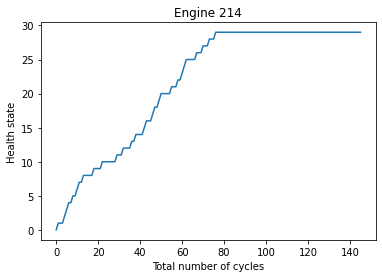

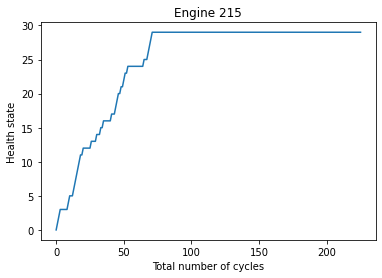

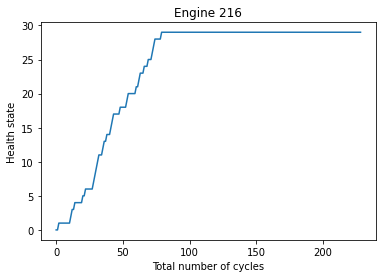

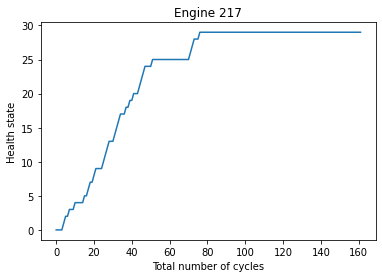

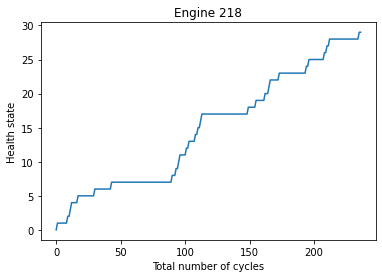

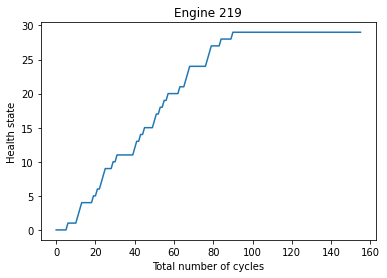

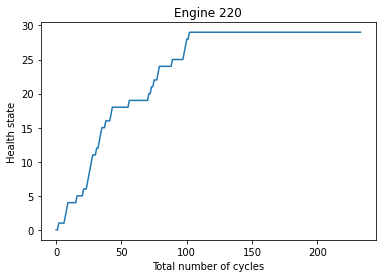

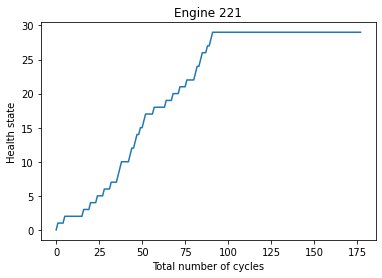

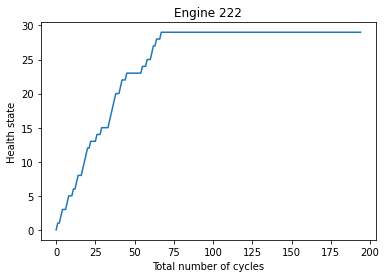

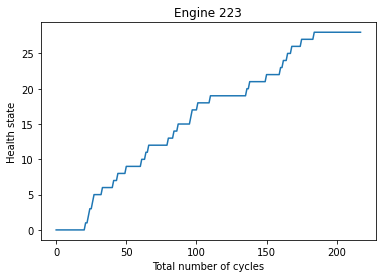

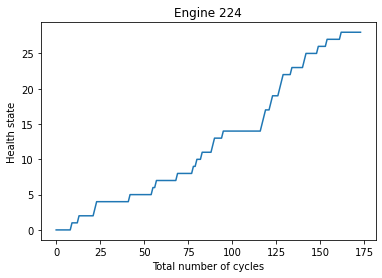

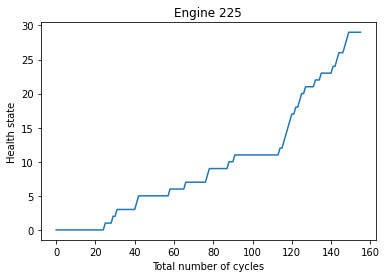

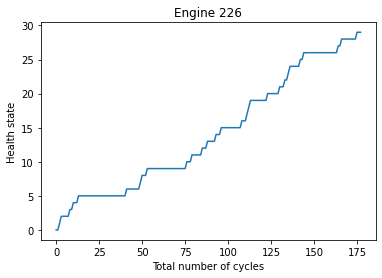

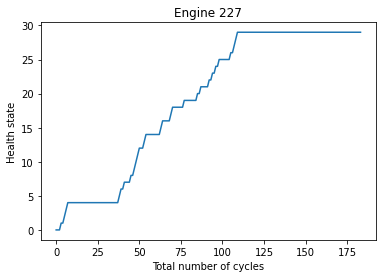

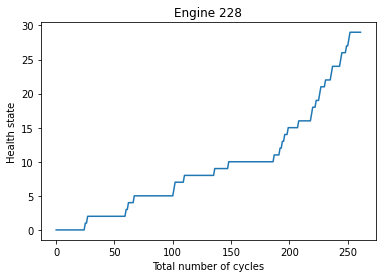

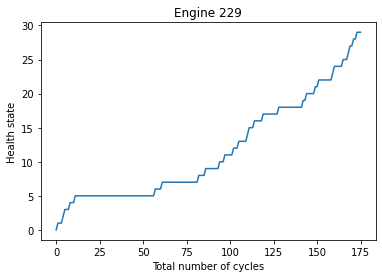

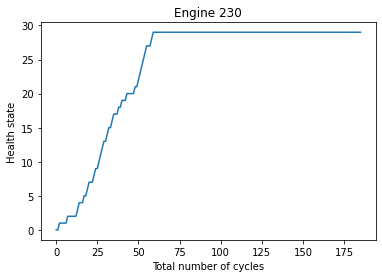

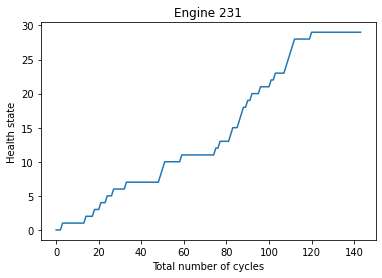

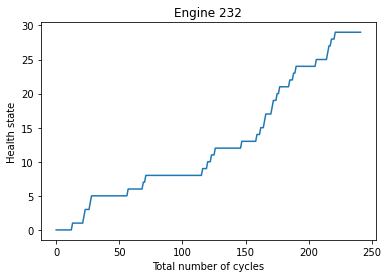

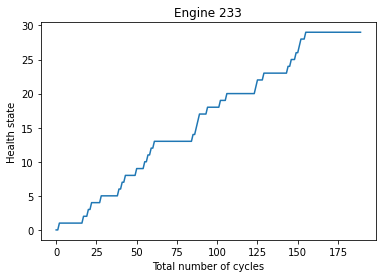

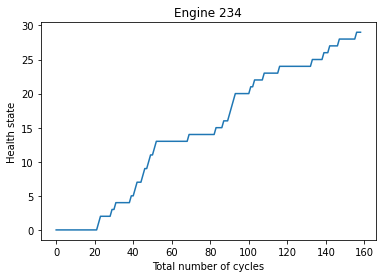

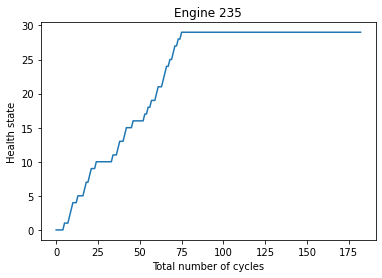

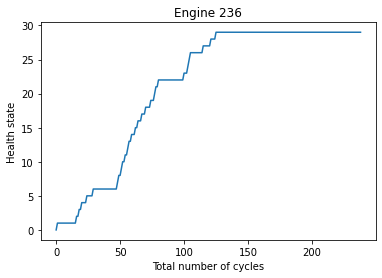

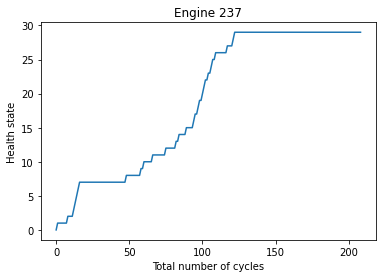

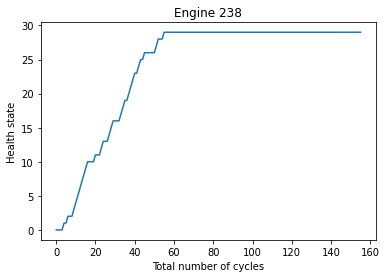

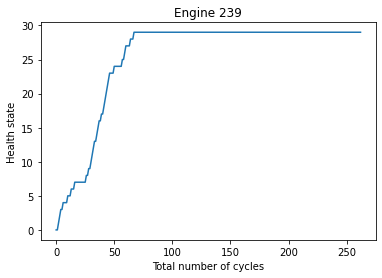

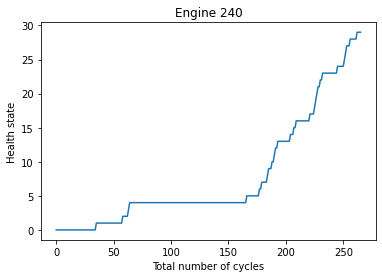

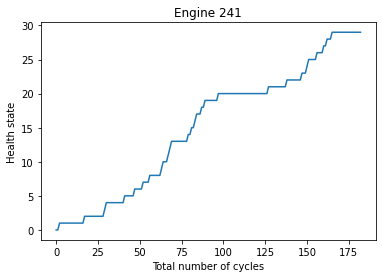

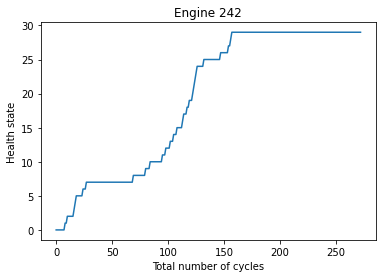

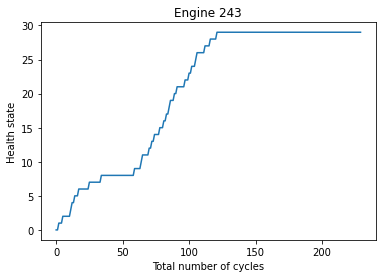

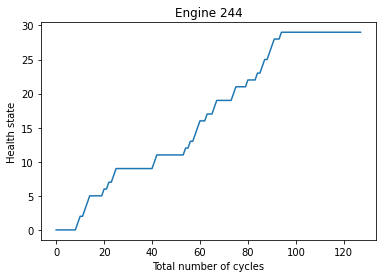

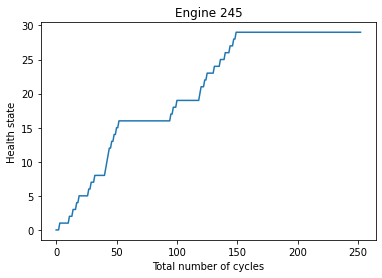

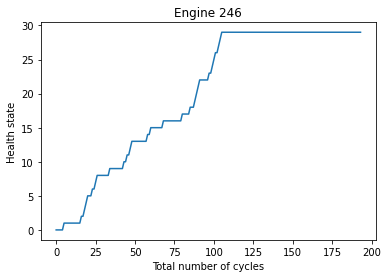

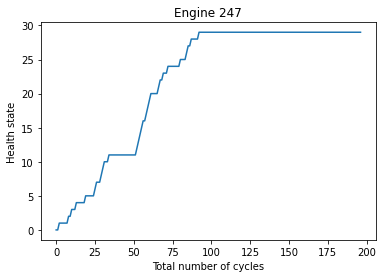

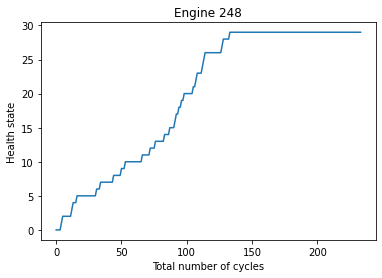

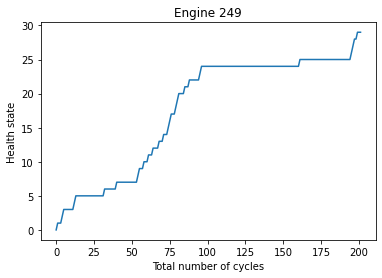

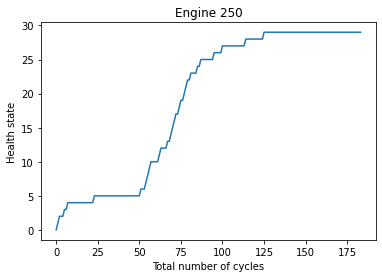

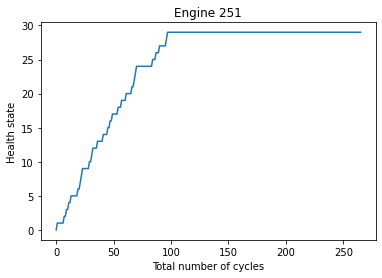

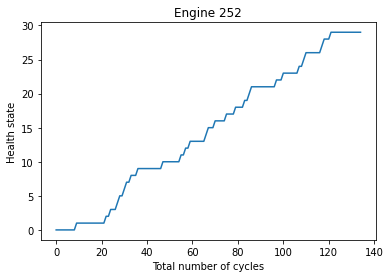

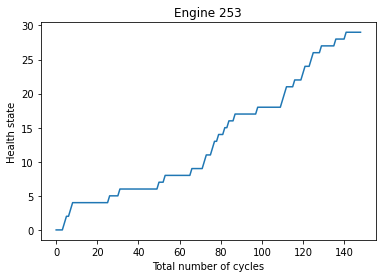

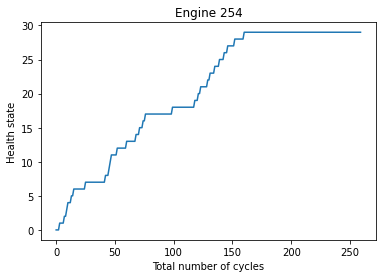

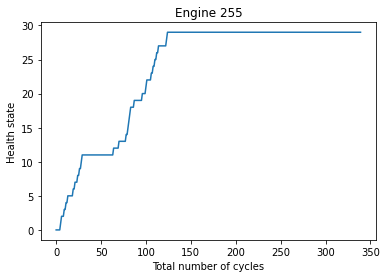

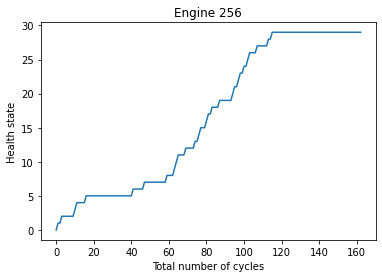

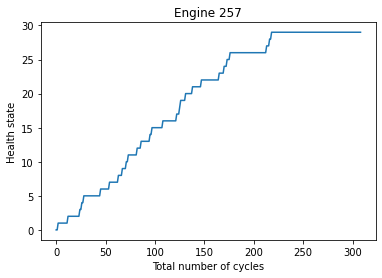

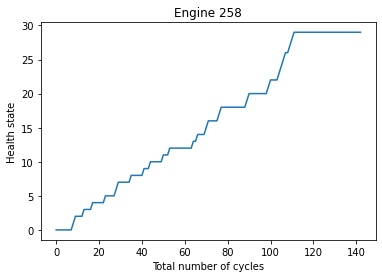

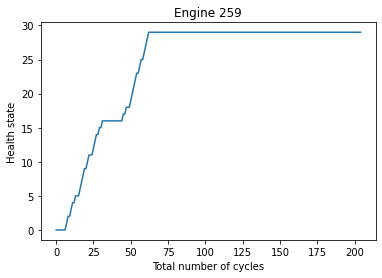

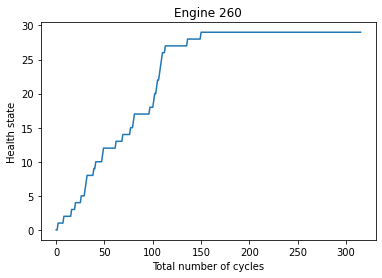

In [24]:
import matplotlib.pyplot as plt
for i in range(0,engines):
  plt.plot(health_state[i])
  plt.xlabel('Total number of cycles')
  plt.ylabel('Health state')
  plt.title(f'Engine %d'%(i+1))
  plt.show()